<a href="https://colab.research.google.com/github/sysiphe0/dacon/blob/master/dacon_202002_star.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def makeDataSet() :
  train = pd.read_csv("/content/train.csv")
  test = pd.read_csv("/content/test.csv")
  train = train.dropna()
  test = test.dropna()
  train_x = train.drop('type', axis=1, inplace=False)
  train_y = train['type']
  x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11)
  return x_train, x_test, y_train, y_test, test

In [3]:
x_train, x_test, y_train, y_test, test = makeDataSet()

In [4]:
dt_clf = DecisionTreeClassifier(random_state=99)
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)
accuracy_score(y_test, pred)

0.8137650413855464

In [9]:
dt_clf.feature_importances_

array([0.01101618, 0.02974193, 0.10191808, 0.10124634, 0.02286637,
       0.02899496, 0.07433902, 0.01756477, 0.01742128, 0.02389579,
       0.01264006, 0.01559907, 0.01331544, 0.01794883, 0.02932809,
       0.01191863, 0.03403317, 0.10157393, 0.03105947, 0.10921487,
       0.01533324, 0.17903048])

In [5]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth' : [6,8,10,12,16,20,24]
}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv = 5, verbose=1)
grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=99,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             

In [6]:
grid_cv.best_score_

0.84233360865974

In [7]:
grid_cv.best_params_

{'max_depth': 12}

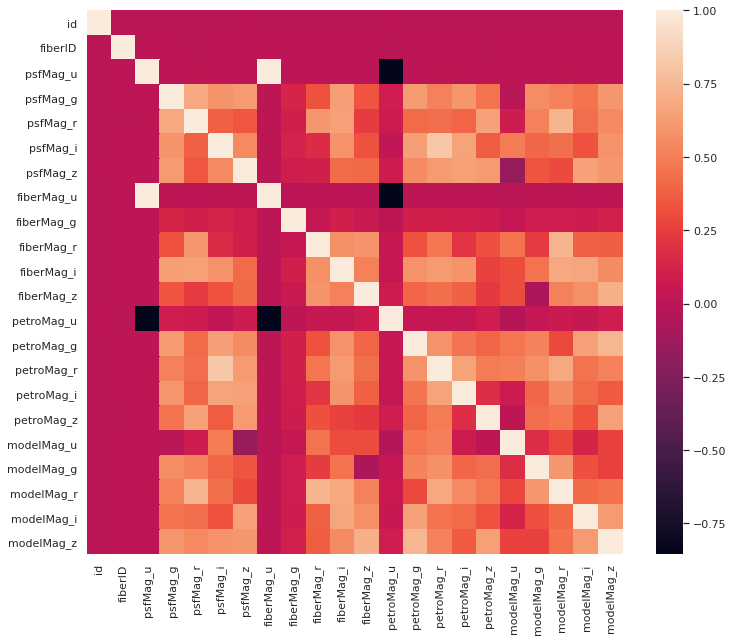

In [8]:
corr = x_train.corr(method='pearson')
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(corr)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_train_x = scaler.fit_transform(x_train)
pca_std_train_x = pca.fit_transform(std_train_x)

In [23]:
pca_std_train_x

array([[-0.00831953, -0.01503018, -0.02996359],
       [-0.0838429 , -0.01224513, -0.00307428],
       [ 0.050332  , -0.00625342,  0.01644581],
       ...,
       [-0.02932648, -0.0077126 , -0.03685377],
       [ 0.06405605, -0.00744493,  0.01986849],
       [ 0.07010069,  0.00082757,  0.03379176]])

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')
vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)
accuracy_score(y_test, pred)

In [ ]:
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(x_train, y_train)
  pred = classifier.predict(x_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도 : 0.2529
KNeighborsClassifier 정확도 : 0.2362


In [25]:
std_test_x = scaler.fit_transform(x_test)
pca_std_test_x = pca.fit_transform(std_test_x)

In [31]:
pca_train_x = pca.fit_transform(x_train)
pca_test_x = pca.fit_transform(x_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=99)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy_score(y_test, pred)

0.8751825832927592

In [32]:
rf_clf.fit(pca_train_x, y_train)
pred = rf_clf.predict(pca_test_x)
accuracy_score(y_test, pred)

0.10186408847464701

In [33]:
rf_clf.fit(pca_std_train_x, y_train)
pred = rf_clf.predict(pca_std_test_x)
accuracy_score(y_test, pred)

0.26643249634833416

In [ ]:
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
import time
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=99)
gb_clf.fit(x_train, y_train)
gb_pred = gb_clf.predict(x_test)

accuracy_score(y_test, gb_pred)
#time.time()-start_time

0.39264102385755023

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_clf.fit(x_train, y_train)
pred = xgb_clf.predict(x_test)
accuracy_score(y_test, pred)